In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras import regularizers

In [ ]:
temp = pd.read_csv("/content/drive/MyDrive/Minor Final/Dataset/Final_Dataset/Cabbage_Local.csv")

In [ ]:
temp.drop('Commodity', axis=1, inplace=True)

In [ ]:
temp.head()

,Date,Average
0,6/16/2013,8.0
1,6/17/2013,8.0
2,6/18/2013,9.0
3,6/19/2013,12.5
4,6/20/2013,12.5


In [ ]:
#Normalizing the average column
scaler = MinMaxScaler()
temp['Average'] = scaler.fit_transform(temp['Average'].values.reshape(-1, 1))

In [ ]:
#converting date to datetime format and using date as index
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Date'] = temp['Date'].dt.strftime('%m-%d-%Y')
temp.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

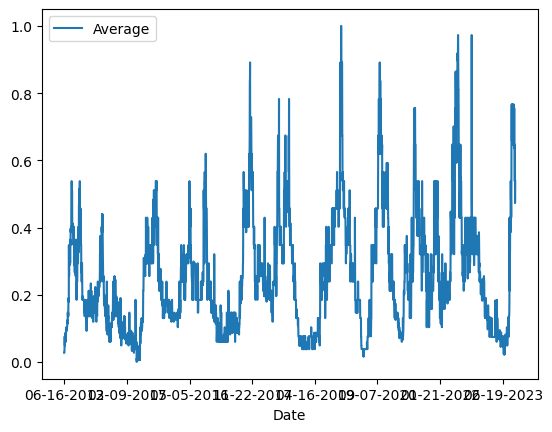

In [ ]:
temp.plot()

In [ ]:
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)

In [ ]:
X1= np.squeeze(X1)
y1 = np.squeeze(y1)
# Print the new shapes
print(X1.shape, y1.shape)

(3595, 5) (3595,)


In [ ]:
X_train1, y_train1 = X1[:2500], y1[:2500]
X_val1, y_val1 = X1[2500:3000], y1[2500:3000]
X_test1, y_test1 = X1[3000:], y1[3000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((2500, 5), (2500,), (500, 5), (500,), (595, 5), (595,))

In [ ]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model1 = Sequential([
#     InputLayer(input_shape=(5, 1)),
#     LSTM(64, kernel_regularizer=regularizers.l2(l2_reg),
#          recurrent_regularizer=regularizers.l2(l2_reg),
#          bias_regularizer=regularizers.l2(l2_reg)),
#     Dropout(0.2),
#     Dense(8, activation='relu', kernel_regularizer=regularizers.l2(l2_reg),
#           bias_regularizer=regularizers.l2(l2_reg)),
#     Dropout(0.2),
#     Dense(1, activation='linear', kernel_regularizer=regularizers.l2(l2_reg),
#           bias_regularizer=regularizers.l2(l2_reg))
# ])

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
# model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
# l2_reg = 0.001

model1.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[RootMeanSquaredError(), MeanAbsoluteError()]
)

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=50, callbacks=[cp1])

Epoch 1/50
79/79 [==============================] - 9s 75ms/step - loss: 0.0093 - root_mean_squared_error: 0.0965 - mean_absolute_error: 0.0641 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0627 - val_mean_absolute_error: 0.0437
Epoch 2/50
79/79 [==============================] - 8s 105ms/step - loss: 0.0023 - root_mean_squared_error: 0.0482 - mean_absolute_error: 0.0316 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610 - val_mean_absolute_error: 0.0421
Epoch 3/50
79/79 [==============================] - 1s 10ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468 - mean_absolute_error: 0.0308 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651 - val_mean_absolute_error: 0.0490
Epoch 4/50
79/79 [==============================] - 4s 51ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - mean_absolute_error: 0.0311 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607 - val_mean_absolute_error: 0.0442
Epoch 5/50
79/79 [==============================] - 5s 59ms

In [ ]:
# # Train the model on historical data for forecasting
# model1.fit(X_train1, y_train1, epochs=50, batch_size=32, callbacks=[cp1])

Epoch 1/50
77/79 [============================>.] - ETA: 0s - loss: 0.1299 - root_mean_squared_error: 0.1538 - mean_absolute_error: 0.1096

79/79 [==============================] - 4s 7ms/step - loss: 0.1293 - root_mean_squared_error: 0.1531 - mean_absolute_error: 0.1091
Epoch 2/50
71/79 [=========================>....] - ETA: 0s - loss: 0.0738 - root_mean_squared_error: 0.0689 - mean_absolute_error: 0.0527

79/79 [==============================] - 0s 6ms/step - loss: 0.0728 - root_mean_squared_error: 0.0674 - mean_absolute_error: 0.0515
Epoch 3/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0561 - root_mean_squared_error: 0.0504 - mean_absolute_error: 0.0357

79/79 [==============================] - 1s 7ms/step - loss: 0.0558 - root_mean_squared_error: 0.0509 - mean_absolute_error: 0.0358
Epoch 4/50
75/79 [===========================>..] - ETA: 0s - loss: 0.0458 - root_mean_squared_error: 0.0482 - mean_absolute_error: 0.0329

79/79 [==============================] - 0s 6ms/step - loss: 0.0456 - root_mean_squared_error: 0.0481 - mean_absolute_error: 0.0329
Epoch 5/50
71/79 [=========================>....] - ETA: 0s - loss: 0.0383 - root_mean_squared_error: 0.0469 - mean_absolute_error: 0.0315

79/79 [==============================] - 0s 6ms/step - loss: 0.0380 - root_mean_squared_error: 0.0468 - mean_absolute_error: 0.0314
Epoch 6/50
71/79 [=========================>....] - ETA: 0s - loss: 0.0321 - root_mean_squared_error: 0.0464 - mean_absolute_error: 0.0311

79/79 [==============================] - 0s 6ms/step - loss: 0.0318 - root_mean_squared_error: 0.0462 - mean_absolute_error: 0.0311
Epoch 7/50
71/79 [=========================>....] - ETA: 0s - loss: 0.0270 - root_mean_squared_error: 0.0461 - mean_absolute_error: 0.0311

79/79 [==============================] - 0s 6ms/step - loss: 0.0268 - root_mean_squared_error: 0.0460 - mean_absolute_error: 0.0309
Epoch 8/50
78/79 [============================>.] - ETA: 0s - loss: 0.0226 - root_mean_squared_error: 0.0454 - mean_absolute_error: 0.0303

79/79 [==============================] - 0s 6ms/step - loss: 0.0226 - root_mean_squared_error: 0.0454 - mean_absolute_error: 0.0302
Epoch 9/50
78/79 [============================>.] - ETA: 0s - loss: 0.0191 - root_mean_squared_error: 0.0452 - mean_absolute_error: 0.0304

79/79 [==============================] - 1s 6ms/step - loss: 0.0191 - root_mean_squared_error: 0.0452 - mean_absolute_error: 0.0304
Epoch 10/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.0447 - mean_absolute_error: 0.0295

79/79 [==============================] - 0s 6ms/step - loss: 0.0163 - root_mean_squared_error: 0.0447 - mean_absolute_error: 0.0297
Epoch 11/50
72/79 [==========================>...] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.0439 - mean_absolute_error: 0.0293

79/79 [==============================] - 0s 6ms/step - loss: 0.0140 - root_mean_squared_error: 0.0443 - mean_absolute_error: 0.0293
Epoch 12/50
76/79 [===========================>..] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.0442 - mean_absolute_error: 0.0294

79/79 [==============================] - 1s 7ms/step - loss: 0.0122 - root_mean_squared_error: 0.0441 - mean_absolute_error: 0.0294
Epoch 13/50
77/79 [============================>.] - ETA: 0s - loss: 0.0107 - root_mean_squared_error: 0.0441 - mean_absolute_error: 0.0294

79/79 [==============================] - 0s 6ms/step - loss: 0.0107 - root_mean_squared_error: 0.0442 - mean_absolute_error: 0.0294
Epoch 14/50
77/79 [============================>.] - ETA: 0s - loss: 0.0095 - root_mean_squared_error: 0.0433 - mean_absolute_error: 0.0286

79/79 [==============================] - 1s 8ms/step - loss: 0.0095 - root_mean_squared_error: 0.0434 - mean_absolute_error: 0.0287
Epoch 15/50
77/79 [============================>.] - ETA: 0s - loss: 0.0087 - root_mean_squared_error: 0.0451 - mean_absolute_error: 0.0305

79/79 [==============================] - 1s 9ms/step - loss: 0.0087 - root_mean_squared_error: 0.0450 - mean_absolute_error: 0.0304
Epoch 16/50
79/79 [==============================] - ETA: 0s - loss: 0.0079 - root_mean_squared_error: 0.0431 - mean_absolute_error: 0.0285

79/79 [==============================] - 1s 9ms/step - loss: 0.0079 - root_mean_squared_error: 0.0431 - mean_absolute_error: 0.0285
Epoch 17/50
77/79 [============================>.] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.0432 - mean_absolute_error: 0.0289

79/79 [==============================] - 1s 9ms/step - loss: 0.0074 - root_mean_squared_error: 0.0432 - mean_absolute_error: 0.0288
Epoch 18/50
79/79 [==============================] - ETA: 0s - loss: 0.0071 - root_mean_squared_error: 0.0437 - mean_absolute_error: 0.0292

79/79 [==============================] - 1s 8ms/step - loss: 0.0071 - root_mean_squared_error: 0.0437 - mean_absolute_error: 0.0292
Epoch 19/50
77/79 [============================>.] - ETA: 0s - loss: 0.0067 - root_mean_squared_error: 0.0433 - mean_absolute_error: 0.0287

79/79 [==============================] - 1s 9ms/step - loss: 0.0067 - root_mean_squared_error: 0.0432 - mean_absolute_error: 0.0287
Epoch 20/50
79/79 [==============================] - ETA: 0s - loss: 0.0065 - root_mean_squared_error: 0.0433 - mean_absolute_error: 0.0287

79/79 [==============================] - 1s 8ms/step - loss: 0.0065 - root_mean_squared_error: 0.0433 - mean_absolute_error: 0.0287
Epoch 21/50
77/79 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0434 - mean_absolute_error: 0.0288

79/79 [==============================] - 1s 6ms/step - loss: 0.0064 - root_mean_squared_error: 0.0433 - mean_absolute_error: 0.0288
Epoch 22/50
74/79 [===========================>..] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0429 - mean_absolute_error: 0.0284

79/79 [==============================] - 1s 7ms/step - loss: 0.0063 - root_mean_squared_error: 0.0431 - mean_absolute_error: 0.0286
Epoch 23/50
77/79 [============================>.] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0434 - mean_absolute_error: 0.0291

79/79 [==============================] - 1s 6ms/step - loss: 0.0062 - root_mean_squared_error: 0.0435 - mean_absolute_error: 0.0292
Epoch 24/50
74/79 [===========================>..] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0432 - mean_absolute_error: 0.0287

79/79 [==============================] - 0s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0427 - mean_absolute_error: 0.0284
Epoch 25/50
74/79 [===========================>..] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0422 - mean_absolute_error: 0.0280

79/79 [==============================] - 1s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0427 - mean_absolute_error: 0.0282
Epoch 26/50
72/79 [==========================>...] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0430 - mean_absolute_error: 0.0284

79/79 [==============================] - 0s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0427 - mean_absolute_error: 0.0283
Epoch 27/50
72/79 [==========================>...] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0425 - mean_absolute_error: 0.0278

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0420 - mean_absolute_error: 0.0276
Epoch 28/50
76/79 [===========================>..] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0432 - mean_absolute_error: 0.0288

79/79 [==============================] - 1s 11ms/step - loss: 0.0061 - root_mean_squared_error: 0.0430 - mean_absolute_error: 0.0287
Epoch 29/50
72/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0427 - mean_absolute_error: 0.0283

79/79 [==============================] - 0s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0429 - mean_absolute_error: 0.0285
Epoch 30/50
75/79 [===========================>..] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0431 - mean_absolute_error: 0.0286

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0427 - mean_absolute_error: 0.0284
Epoch 31/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0418 - mean_absolute_error: 0.0278

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0423 - mean_absolute_error: 0.0280
Epoch 32/50
74/79 [===========================>..] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0426 - mean_absolute_error: 0.0281

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0423 - mean_absolute_error: 0.0280
Epoch 33/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0422 - mean_absolute_error: 0.0282

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0425 - mean_absolute_error: 0.0282
Epoch 34/50
72/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0421 - mean_absolute_error: 0.0281

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0423 - mean_absolute_error: 0.0281
Epoch 35/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0433 - mean_absolute_error: 0.0287

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0427 - mean_absolute_error: 0.0283
Epoch 36/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0428 - mean_absolute_error: 0.0285

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0428 - mean_absolute_error: 0.0286
Epoch 37/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0428 - mean_absolute_error: 0.0286

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0430 - mean_absolute_error: 0.0286
Epoch 38/50
75/79 [===========================>..] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0432 - mean_absolute_error: 0.0291

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0429 - mean_absolute_error: 0.0288
Epoch 39/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0426 - mean_absolute_error: 0.0283

79/79 [==============================] - 0s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0429 - mean_absolute_error: 0.0284
Epoch 40/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0429 - mean_absolute_error: 0.0281

79/79 [==============================] - 1s 8ms/step - loss: 0.0060 - root_mean_squared_error: 0.0427 - mean_absolute_error: 0.0281
Epoch 41/50
73/79 [==========================>...] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0425 - mean_absolute_error: 0.0283

79/79 [==============================] - 1s 8ms/step - loss: 0.0060 - root_mean_squared_error: 0.0428 - mean_absolute_error: 0.0285
Epoch 42/50
77/79 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0422 - mean_absolute_error: 0.0279

79/79 [==============================] - 1s 9ms/step - loss: 0.0060 - root_mean_squared_error: 0.0424 - mean_absolute_error: 0.0279
Epoch 43/50
77/79 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0426 - mean_absolute_error: 0.0283

79/79 [==============================] - 1s 9ms/step - loss: 0.0060 - root_mean_squared_error: 0.0426 - mean_absolute_error: 0.0283
Epoch 44/50
76/79 [===========================>..] - ETA: 0s - loss: 0.0059 - root_mean_squared_error: 0.0417 - mean_absolute_error: 0.0276

79/79 [==============================] - 1s 9ms/step - loss: 0.0060 - root_mean_squared_error: 0.0422 - mean_absolute_error: 0.0277
Epoch 45/50
78/79 [============================>.] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0423 - mean_absolute_error: 0.0281

79/79 [==============================] - 1s 11ms/step - loss: 0.0060 - root_mean_squared_error: 0.0423 - mean_absolute_error: 0.0281
Epoch 46/50
74/79 [===========================>..] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0426 - mean_absolute_error: 0.0282

79/79 [==============================] - 1s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0425 - mean_absolute_error: 0.0281
Epoch 47/50
72/79 [==========================>...] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0436 - mean_absolute_error: 0.0292

79/79 [==============================] - 0s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0437 - mean_absolute_error: 0.0292
Epoch 48/50
77/79 [============================>.] - ETA: 0s - loss: 0.0061 - root_mean_squared_error: 0.0434 - mean_absolute_error: 0.0296

79/79 [==============================] - 1s 6ms/step - loss: 0.0061 - root_mean_squared_error: 0.0435 - mean_absolute_error: 0.0297
Epoch 49/50
74/79 [===========================>..] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0428 - mean_absolute_error: 0.0283

79/79 [==============================] - 1s 7ms/step - loss: 0.0060 - root_mean_squared_error: 0.0425 - mean_absolute_error: 0.0281
Epoch 50/50
75/79 [===========================>..] - ETA: 0s - loss: 0.0060 - root_mean_squared_error: 0.0423 - mean_absolute_error: 0.0281

79/79 [==============================] - 1s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0424 - mean_absolute_error: 0.0281


In [ ]:
model1.save('/content/drive/MyDrive/Minor Final/LSTM_Finals model/LSTM_cabbage_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model1 = load_model("/content/drive/MyDrive/Minor Final/LSTM_Finals model/LSTM_cabbage_model.h5")

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

79/79 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,0.067401,0.048913
1,0.051888,0.076087
2,0.066932,0.076087
3,0.071416,0.070652
4,0.068500,0.070652
...,...,...
2495,0.446813,0.456522
2496,0.446813,0.456522
2497,0.446813,0.456522
2498,0.446813,0.456522


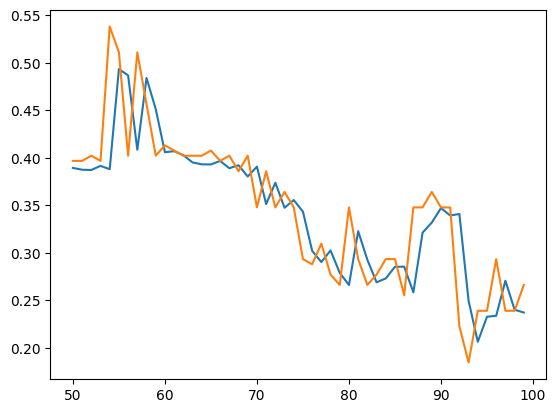

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results.tail()

16/16 [==============================] - 0s 6ms/step


,Val Predictions,Actuals
495,0.139325,0.130435
496,0.133874,0.130435
497,0.130500,0.130435
498,0.127256,0.211957
499,0.184269,0.130435


In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

19/19 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
0,0.140192,0.114130
1,0.120913,0.130435
2,0.127746,0.114130
3,0.117338,0.130435
4,0.123917,0.130435
...,...,...
590,0.623735,0.646739
591,0.630239,0.538043
592,0.542115,0.646739
593,0.617088,0.472826


In [ ]:
#TEST MSE,MAE and RMSC
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test1, test_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test1, test_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [ ]:
#Print MSE,MAE and RMSC
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.003206640347089532
Mean Absolute Error (MAE): 0.0316141549721224
Root Mean Squared Error (RMSE): 0.056627205008631075


In [ ]:
test_predictions = model1.predict(X_test1).flatten()

# Calculate R^2 score
r2score = r2_score(y_test1, test_predictions)

print("R^2 Score:", r2score)
accuracy_percentage = r2score * 100
print("Accuracy (R^2 Score) in Percentage:", accuracy_percentage)


19/19 [==============================] - 0s 2ms/step
R^2 Score: 0.9267453560798169
Accuracy (R^2 Score) in Percentage: 92.6745356079817


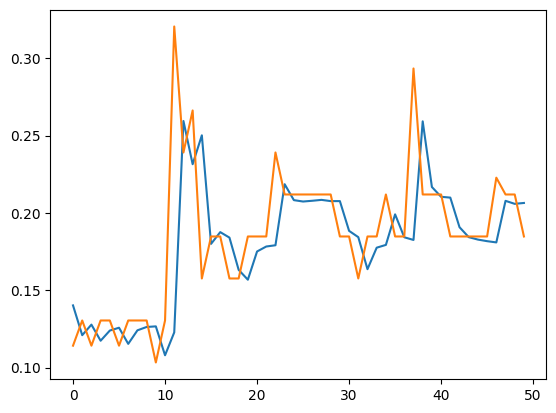

In [ ]:
plt.plot(test_results['Test Predictions'][:50])
plt.plot(test_results['Actuals'][:50])

In [ ]:
future_steps = 5
# Start with the last sequence from the test set
current_sequence = [0.4509047 , 0.42721939, 0.44274905,0.41973385 ,0.4348805]

## Initialize an array to store the forecasted values
forecasted_values = []

# Iterate to predict future steps
for i in range(future_steps):
    # Predict the next value
    next_value_normalized = model1.predict(np.expand_dims(current_sequence, axis=0))[0][0]

    # Denormalize the predicted value
    next_value = scaler.inverse_transform([[next_value_normalized]])[0][0]

    # Append the denormalized predicted value to the forecasted values
    forecasted_values.append(next_value)

    # Update the current sequence by removing the first element and adding the predicted value at the end
    current_sequence = np.append(current_sequence[1:], next_value_normalized)

# Print the forecasted values
print("Forecasted Values for the next", future_steps, "steps:", forecasted_values)


1/1 [==============================] - 0s 45ms/step
Forecasted Values for the next 5 steps: [44.5924391746521, 43.95723223686218, 43.41222822666168, 42.88149809837341, 42.4074330329895]


In [ ]:
print(current_sequence)

[0.4509047  0.44274905 0.4348805  0.42721939 0.41973385]


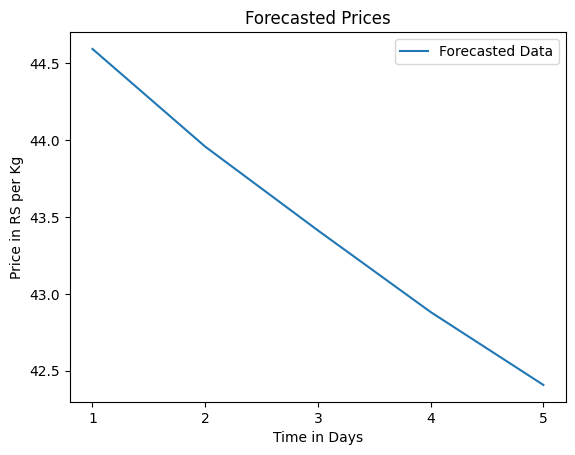

In [ ]:
# Plot forecasted values
plt.plot(range(1, future_steps + 1), forecasted_values, label='Forecasted Data')

# Set labels and title
plt.xlabel('Time in Days')
plt.ylabel('Price in RS per Kg')
plt.title('Forecasted Prices')
plt.legend()

# Set x-axis ticks to show 1, 2, 3, ..., future_steps
plt.xticks(range(1, future_steps + 1))

# Show plot
plt.show()